# 실습 2: 데이터셋 가지고 놀기

본 실습에서 사용하는 데이터셋(2019 NBA 드래프트)의 출처는 다음과 같음을 밝힌다.

Raw Data 출처: Aran_Smith, 〈2019 NBA Draft Combine Measurements〉, 《NBADRAFT.NET》, 〈https://www.nbadraft.net/2019-nba-draft-combine-measurements/〉, 개제 2019.05.19, 방문 날짜 2022.03.01.

편집자: MIT Beaverworks에서 NetCDF-4 형식으로 편집

우리가 계속 사용해온 2019 NBA 드래프트 참가자들의 신체 정보가 담긴 데이터에 대해 탐색해보자. 이는 본격적인 학습에 들어가기 전에 꼭 필요한 작업이다. 데이터 탐색 없이 바로 분석에 뛰어드는 책으로만 공부하는 경우, 동일한 분석 수단을 그대로 적용할 수 없는 데이터를 만났을 때에도 동일 분석 수단을 그대로 적용해버리는 실수를 할 수 있다.

데이터를 탐색할 때에는 세 가지 질문을 던져야 한다.
> 1) 데이터의 형식은 무엇인가? 데이터의 범위, 차원(개수) 등을 기본적으로 확인하고, 모든 데이터가 동일한 형식으로 저장되었는지, 압축 등 노이즈를 유발하는 요인은 없는지 체크해야 한다.
>
> 2) 데이터의 수집 방법은 무엇인가? 데이터의 단위(ex – 센티미터, 인치 등), 데이터가 수집된 환경 등을 확인하며, 명백한 측정 오류는 없는지, 데이터의 편향을 유발하는 요인은 없는지 체크해야 한다.
>
> 3) 데이터의 통계는 어떠한가? 최대, 최솟값을 비롯한 다양한 통계량을 확인하고, 산점도, 히스토그램 등 시각화를 이용하여 데이터의 분포를 확인해야 한다.

2019 NBA 드래프트 참가자 데이터셋를 탐색해보자

우리가 사용할 "nba_draft_measurements.nc"의 데이터 형식은 NetCDF-4 형식으로, 수집된 측정을 정확히 반영하여 저장하는 파일 형식이므로 노이즈 유발 등의 영향이 없다. 그리고 데이터의 수집 방법은 농구 선수들을 대상으로 하였기 때문에 일반인들보다 신체조건이 우월한 쪽으로 편향이 되어 있고, 길이의 단위는 인치, 무게의 단위는 파운드로 측정이 되었다. 또한 길이는 1/4인치까지, 무게는 1/5파운드까지 측정이 되어있으며, 이는 측정의 정밀도와 관련된 오류의 원인이 될 수 있다.

### Step 0. 구글 드라이브와 연동하기

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Step 1. 데이터셋 출력하여 살펴보기

아래 코드의 느낌표는 Jupyter Notebook이나 Google Colab과 같은 대화형 환경에서 셸 명령어를 실행할 수 있도록 한다. 즉, Python 코드가 아닌 셸 명령어를 실행하기 위해 사용한다.

In [2]:
# 코랩에서 필요한 패키지 설치
!pip install netCDF4 pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.7 MB/s eta 0:00:00


netCDF4 라이브러리를 이용하면 NetCDF-4 형식의 데이터를 불러올 수 있다. NetCDF-4 형식의 데이터를 pandas.DataFrame 데이터로 변환시키면 이 데이터는 numpy.ndarray로 쉽게 변환이 된다. 아래 코드를 실행시키면 우리의 데이터셋이 어떻게 구성되어 있는지 확인할 수 있다.

In [3]:
#from pathlib import Path
import netCDF4 as nc
import pandas as pd
import numpy as np

In [4]:
# netCDF4 라이브러리를 이용하여 NetCDF-4 파일을 불러오기
draft_data = nc.Dataset("/content/gdrive/MyDrive/nba_draft_measurements.nc")

# netCDF4 Dataset에서 데이터 추출
# 여기서 변수 이름은 실제 파일의 구조에 따라 변경해야 한다.
data = {}
for var in draft_data.variables:
    data[var] = draft_data.variables[var][:]

# pandas DataFrame으로 변환
draft_data = pd.DataFrame(data)

# 데이터셋 보이기
draft_data.head()

,names,position,height_no_shoes,height_with_shoes,weight,wingspan,standing_reach,body_fat_prcnt,hand_length,hand_width
0,Nickeil Alexander-Walker,SG,76.25,77.50,203.8,81.50,102.0,5.9,8.50,8.75
1,Charles Bassey,C,80.75,82.00,239.0,87.50,109.5,8.5,9.25,9.50
2,Darius Bazley,PF,79.75,81.00,208.4,84.00,107.0,3.6,9.00,9.75
3,Bol Bol,C,84.75,86.50,208.0,91.00,115.5,7.1,9.25,9.50
4,Jordan Bone,SG,73.50,74.75,179.0,75.25,95.0,5.0,7.50,9.25


### Step 2. 데이터의 각 특성(feature)에 개별적으로 접근하기

pandas.DataFrame의 데이터셋에서 원하는 특성의 데이터에만 접근하는 것은 간단하다. 그리고 접근한 데이터 배열을 numpy의 ndarray 형식으로 변환해줄 수도 있다. 아래 두 코드를 실행해보고 그 차이를 이해해보자.

In [5]:
# height_no_shoes 특성의 데이터 배열에 접근하기
draft_data.height_no_shoes

0     76.25
1     80.75
2     79.75
3     84.75
4     73.50
      ...  
65    75.00
66    75.50
67    78.25
68    77.75
69    78.25
Name: height_no_shoes, Length: 70, dtype: float64

In [6]:
# height_no_shoes 특성의 데이터 배열에 numpy.ndarray 형식으로 접근하기
draft_data.height_no_shoes.values

array([76.25, 80.75, 79.75, 84.75, 73.5 , 78.25, 73.  , 77.75, 79.  ,
       85.25, 79.25, 82.  , 79.25, 77.25, 75.  , 74.75, 72.  , 70.75,
       89.25, 80.75, 81.25, 76.  , 72.75, 73.5 , 69.75, 82.25, 81.  ,
       76.5 , 79.25, 74.5 , 76.  , 76.25, 76.75, 79.  , 80.75, 78.75,
       76.5 , 79.  , 74.5 , 76.5 , 76.75, 76.75, 77.  , 80.25, 76.5 ,
       75.25, 77.75, 79.25, 76.25, 78.  , 80.  , 71.5 , 75.5 , 81.75,
       76.  , 82.75, 78.5 , 80.75, 79.25, 81.5 , 76.  , 76.5 , 80.5 ,
       78.5 , 69.5 , 75.  , 75.5 , 78.25, 77.75, 78.25])

pandas.DataFrame는 numpy.ndarray와 동일한 요소별 벡터 연산이 가능하다. height_with_shoes 배열과 height_without_shoes 배열은 크기가 동일하기 때문에 아래와 같은 백터 연산이 가능하다. 아래 세 코드를 실행해보고 그 차이를 이해해보자.

In [7]:
height_added = draft_data.height_with_shoes - draft_data.height_no_shoes
height_added

0     1.25
1     1.25
2     1.25
3     1.75
4     1.25
      ... 
65    1.25
66    1.25
67    1.50
68    1.75
69    1.25
Length: 70, dtype: float64

In [8]:
height_added = draft_data.height_with_shoes - draft_data.height_no_shoes
height_added.values

array([1.25, 1.25, 1.25, 1.75, 1.25, 1.25, 1.25, 1.5 , 1.  , 1.25, 1.  ,
       1.75, 1.5 , 1.5 , 1.5 , 1.5 , 2.  , 1.5 , 1.75, 1.5 , 1.25, 1.25,
       1.5 , 1.5 , 1.25, 1.25, 1.25, 1.5 , 1.75, 1.5 , 1.  , 1.25, 1.25,
       1.5 , 1.5 , 1.25, 1.5 , 1.5 , 1.75, 1.5 , 1.75, 0.75, 1.25, 1.5 ,
       1.  , 1.  , 1.75, 2.25, 1.5 , 1.25, 1.25, 1.  , 2.  , 1.25, 1.5 ,
       1.5 , 1.5 , 0.75, 1.25, 1.5 , 1.25, 1.  , 1.  , 1.5 , 1.25, 1.25,
       1.25, 1.5 , 1.75, 1.25])

In [13]:
height_added = draft_data.height_with_shoes - draft_data.height_no_shoes.values
height_added

0     1.25
1     1.25
2     1.25
3     1.75
4     1.25
      ... 
65    1.25
66    1.25
67    1.50
68    1.75
69    1.25
Name: height_with_shoes, Length: 70, dtype: float64

pandas.DataFrame는 numpy.ndarray와 동일한 mean(), std() 등의 수학 함수도 정의되어 있기 때문에 같은 방식으로 사용할 수 있다. 이 함수들을 이용하면 데이터의 통계량을 쉽게 구할 수 있다. 선수의 신발에 의해 추가된 키의 평균과 표준편차를 계산하는 코드를 스스로 작성해보자.

In [11]:
# 신발에 의해 추가된 키의 평균과 표준편차를 계산
# 여기에 코드 작성
print(height_added.mean())
print(height_added.std())

1.3857142857142857
0.2760878298583956


In [14]:
print(height_added.values.mean())
print(height_added.values.std())

1.3857142857142857
0.2760878298583956


### Step 3. 데이터셋 시각화하기

이제 데이터셋을 시각화하는 방법을 연습해보자. 시각화를 도와주는 라이브러리로는 matplotlib가 있다. import하여 편리하게 사용할 수 있다.

원래 matplotlib.pyplot은 show() 함수를 통해서 그래프를 출력하도록 되어 있다. 그러나 jupyter notebook에서는 매직 커맨드 (magic commend) %을 이용하여 show 없이도 자동으로 그래프를 확인할 수 있다.

%matplotlib inline : 정적인 그래프를 보여준다.

%matplotlib notebook : 동적인 그래프를 보여준다.

동적인 그래프는 시간에 따라 변화하는 그래프를 그릴 수 있다는 것을 의미하며, 시간에 따른 머신러닝의 진행 정도를 살펴볼 때와 같이 쓰임이 유용하다.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

몇 가지 예시를 통해 matplotlib를 사용하는 방법에 대해 연습한 후, 직접 실행해보자. 여기서는 그래프를 그리는 데 필요한 기본적인 규칙들을 안내할 예정이다. (라이브러리의 더 자세하고 다양한 기능을 알아보고 싶다면 스스로 구글링을 해보는 습관을 기르는 것도 도움이 될 것이다.)

fig는 그래프를 그리는 전체 화면을, ax는 그래프를 그릴 공간을 나타낸다고 보면 된다. 아래 두 예제는 각각 하나의 fig에 하나의 ax를 만든 경우와 하나의 fig에 행을 두 개로 나누어 두 개의 ax를 만든 경우이다.

set_title()은 그래프의 제목을 작성해주고, grid()는 ax 그래프 공간에 실선의 좌표격자를 그려주는 함수이다. 그리고, xarray 형태의 draft_data는 각 항목의 이름만 x, y에 대입해주면 plot.scatter를 이용하여 산점도를 쉽게 나타낼 수 있다.

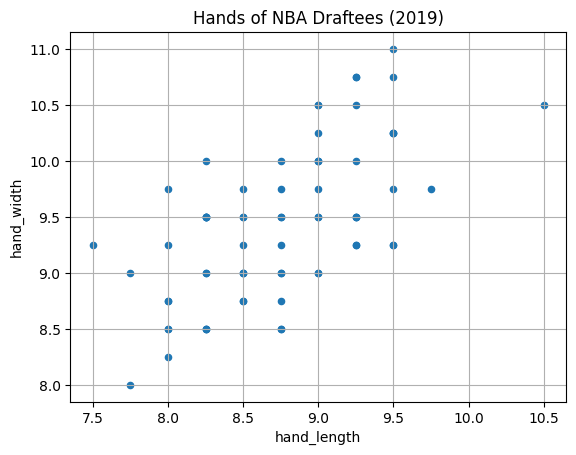

In [16]:
fig, ax = plt.subplots()
draft_data.plot.scatter(x="hand_length", y="hand_width", ax=ax)
ax.set_title("Hands of NBA Draftees (2019)")
ax.grid()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 0 ( ) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 0 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


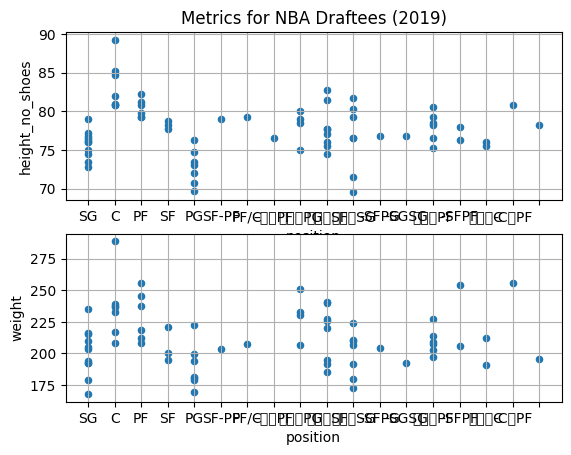

In [17]:
fig, axes = plt.subplots(nrows=2)
draft_data.plot.scatter(x="position", y="height_no_shoes", ax=axes[0])
draft_data.plot.scatter(x="position", y="weight", ax=axes[1])
axes[0].set_title("Metrics for NBA Draftees (2019)")
[ax.grid() for ax in axes];

matplotlib의 기본 사용법을 이용하여 아래와 같이 산점도를 쉽게 나타낼 수 있다. 각 x, y축에 해당하는 데이터를 저장한 후, ax.scatter() 함수를 이용하면 산점도를 그릴 수 있다. 아래 코드를 실행했을 때, 위에서 본 그래프와 동일함을 확인하고 그 이유를 생각해보자.

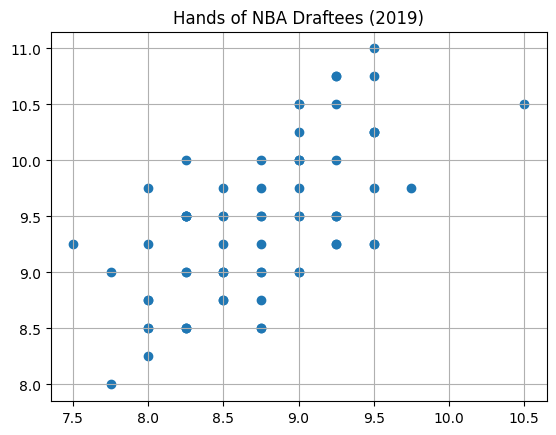

In [18]:
fig, ax = plt.subplots()
x = draft_data.hand_length.values
y = draft_data.hand_width.values
ax.scatter(x, y)
ax.set_title("Hands of NBA Draftees (2019)")
ax.grid()

scatter 함수와 같이 matplotlib를 이용하여 그래프를 그릴 수 있는 함수로는 ax.plot() 함수가 있다. plot 함수를 이용하면 점들을 직선으로 이은 그래프를 그릴 수 있다. 아래 예시와 같이 x에 들어갈 numpy.ndarray를 직접 만들어준 후, 임의의 수학적 함수의 그래프를 그려볼 수 있다. x의 정의역이 불연속적이지만 충분히 많은 원소를 갖기 때문에, 그래프를 그려보았을 때 미분가능한 매끄러운 함수라고 느낄 수 있다.

ax.plot(), ax.scatter() 등은 color(c), linestyle(ls), label 등의 매개변수(parameter)를 통해 색깔, 선의 종류 뿐만 아니라 범례로 들어갈 그래프의 label까지도 지정해줄 수 있다. 이런 인자와 인자에 들어갈 수 있는 값들을 전부 외우기는 어렵고, 그럴 필요도 없으며, 필요할 때 검색을 통해 찾아낼 수 있으면 충분하다.

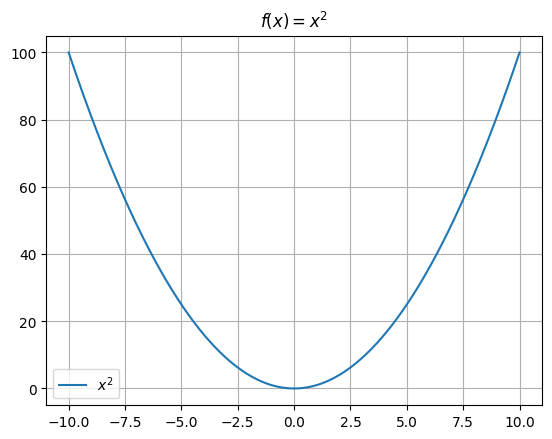

In [19]:
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(-10, 10, 1000)
ax.plot(x, x**2, label="$x^2$")
ax.legend();
ax.set_title("$f(x)=x^2$")
ax.grid()

위의 예시들을 통해 그래프 그리는 법을 잘 이해했다면, 이번에는 직접 그래프를 그려보자. x축이 "height_no_shoes", y축이 "wingspan" 데이터를 나타내는 2D plot을 그려보자. (Hint: x축, y축의 이름을 변경하려면 set_xlabel(), set_ylabel() 함수를 검색해보자)

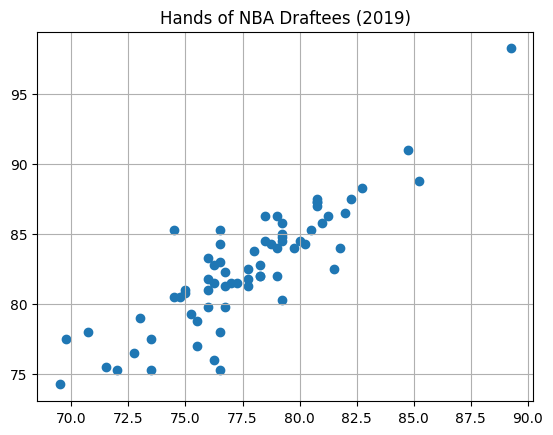

In [20]:
# 윙스팬 vs 키 산점도 그리기

# 여기에 코드 작성
fig, ax = plt.subplots()
x = draft_data.height_no_shoes
y = draft_data.wingspan
ax.scatter(x, y)
ax.set_title("Hands of NBA Draftees (2019)")
ax.grid()

마지막으로 우리가 그린 윙스팬 vs 키 산점도 2D plot 위에 선형 회귀 직선을 그려보자. 우리는 앞선 예제 2-4에서 데이터 쌍을 입력해주었을 때 최적의 선형 회귀 직선의 기울기와 y절편 값을 구해주는 ordinary_least_squares() 함수를 구현한 바 있다. 그 함수를 그대로 가져와서 사용해보자.

또한, 위에서 그린 산점도의 코드를 그대로 가져와서 아래에 코드를 일부 추가하기만 하면 우리가 원하는대로 선형 회귀 직선을 추가할 수 있다.

선형 회귀 직선을 추가할 때는 앞서 한 번 살펴보았던 ax.plot() 함수를 이용하자. ax.plot() 함수는 매개변수로 numpy.ndarray 형식의 x, y 값들을 보내주어야 한다. 추가로 매개변수 c="red", label="mx+b" 와 같이 직선의 색깔과 label을 설정해줄 수 있다. 문자열의 앞 뒤에 다음과 같이 $ 표시를 넣어주면 수식을 입력할 수 있다.

$m^{*}x+b^{*}$

In [21]:
import numpy as np

def ordinary_least_squares(x, y):
    m = (np.sum(x*y)-(np.sum(x)*np.sum(y))/np.shape(x)[0])/(np.sum(x*x)-(np.sum(x))**2/np.shape(x)[0])
    b = y.mean()-m*x.mean()

    return m ,b
# 여기에 코드 작성
x = draft_data.height_no_shoes.values
y = draft_data.wingspan.values
m ,b = ordinary_least_squares(x,y)
print(m)
print(b)

1.0269361143266387
2.8045506927401505


In [23]:
import numpy as np

def ordinary_least_squares(x, y):

    N = x.size
    m = (np.matmul(x,y)-x.sum()*y.sum()/N)/(np.matmul(x, x)-(1/N)*x.sum()**2)
    b = y.mean()-m*x.mean()
    return m, b
x = draft_data.height_no_shoes.values
y = draft_data.wingspan.values
m ,b = ordinary_least_squares(x,y)
print(m)
print(b)

1.0269361143266387
2.8045506927401505


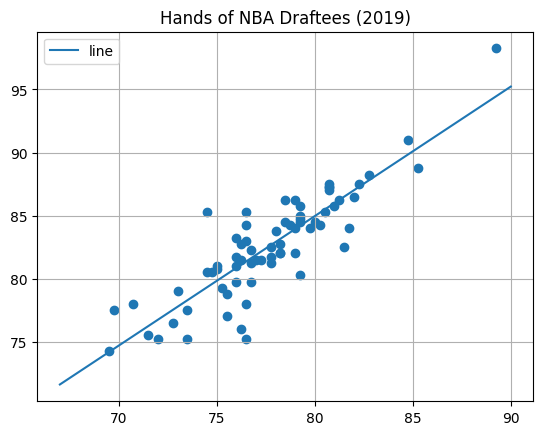

In [25]:
# 윙스팬 vs 키 산점도 그리기 (복습)

# 여기에 코드 작성
fig, ax = plt.subplots()
x = draft_data.height_no_shoes
y = draft_data.wingspan
ax.scatter(x, y)
ax.set_title("Hands of NBA Draftees (2019)")
ax.grid()
# 윙스팬, 키 데이터 각각 접근하여 numpy.ndarray로 변환한 후 m*, b* 구하기
# 여기에 코드 작성
x = draft_data.height_no_shoes.values
y = draft_data.wingspan.values
m ,b = ordinary_least_squares(x,y)

# ax.plot() 함수 사용하여 그래프 그리기
# x의 정의역 데이터 속 키의 최솟값과 최댓값 사이의 구간으로 잡기
# 구간을 1000개 정도로 나누면 충분함
# 여기에 코드 작성
x = np.linspace(67, 90, 1000)
ax.plot(x, m*x+b, label="line")

# 범례로 들어갈 그래프의 label들을 자동으로 생성해주는 함수
ax.legend()

### 배운 내용 되돌아보기

이번 실습에서는 2019 NBA 드래프트 참가자들의 신체 정보가 담긴 데이터셋을 가지고 데이터셋을 다루는 기본적인 방법들을 익혔다.

- 데이터에 대해 탐색하며 데이터의 형식, 수집 방법, 통계에 관한 세 가지 질문을 던졌다. 데이터에 대한 탐색을 바탕으로 적절한 분석 수단(모델)을 선택해야 하며, 오류와 편향을 미리 예측하고 대비할 수 있다.

- pandas 라이브러리를 이용하여 데이터를 불러온 후, 데이터셋을 관찰하였다.

- pandas.DataFrame과 numpy.ndarray를 이용하여 데이터의 각 특성(feature)에 개별적으로 접근하고 필요한 정보를 가져와서 이용하는 연습을 해 보았다. 또한, 데이터의 통계량도 구해보았다.

- matplotlib 라이브러리를 이용하여 데이터를 시각화하는 연습을 해 보았다. 데이터셋의 데이터들을 산점도로 표시해보고, 원하는 함수를 그래프로 그려보기도 하였다.

- 키와 윙스팬의 관계를 나타낸 산점도 위에, 이들의 관계를 나타낼 수 있는 최적의 선형 모델의 그래프를 함께 시각화하였다.
